# ResNet50
#### tensorflow==2.10.0

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout

In [14]:
train_dir = r"C:\Users\91909\Desktop\ML\DATA\PlantVillage-Dataset-master\PlantVillage-Dataset-master\raw\PLANT_VILLAGE_SPLIT\train"
test_dir = r"C:\Users\91909\Desktop\ML\DATA\PlantVillage-Dataset-master\PlantVillage-Dataset-master\raw\PLANT_VILLAGE_SPLIT\test"
val_dir = r"C:\Users\91909\Desktop\ML\DATA\PlantVillage-Dataset-master\PlantVillage-Dataset-master\raw\PLANT_VILLAGE_SPLIT\val"

In [15]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16

In [16]:
def preprocess_function(image):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image

In [17]:
datagen = ImageDataGenerator(rescale=1.0/255,
                             preprocessing_function=preprocess_function)

In [18]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 32572 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.
Found 10885 images belonging to 38 classes.


In [20]:
from tensorflow.keras.applications import ResNet50

In [ ]:
base_model = ResNet50(weights='imagenet' ,include_top=False , input_shape=(224, 224, 3), pooling='max' )

model = Sequential()
model.add(base_model)

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(38, activation='softmax'))

for layer in base_model.layers:
    layer.trainable = False

In [27]:
model.compile(tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.build(input_shape=(None, 224, 224, 3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_3 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_4 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 1024)             

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=5, restore_best_weights=True)

In [30]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
2036/2036 [==============================] - 487s 236ms/step - loss: 1.8747 - accuracy: 0.4723 - val_loss: 1.1421 - val_accuracy: 0.6529
Epoch 2/50
2036/2036 [==============================] - 466s 229ms/step - loss: 1.3854 - accuracy: 0.5819 - val_loss: 0.9698 - val_accuracy: 0.7027
Epoch 3/50
2036/2036 [==============================] - 451s 222ms/step - loss: 1.2274 - accuracy: 0.6260 - val_loss: 0.8842 - val_accuracy: 0.7188
Epoch 4/50
2036/2036 [==============================] - 433s 213ms/step - loss: 1.1350 - accuracy: 0.6536 - val_loss: 0.8362 - val_accuracy: 0.7392
Epoch 5/50
2036/2036 [==============================] - 430s 211ms/step - loss: 1.0522 - accuracy: 0.6754 - val_loss: 0.7969 - val_accuracy: 0.7506
Epoch 6/50
2036/2036 [==============================] - 433s 213ms/step - loss: 0.9948 - accuracy: 0.6913 - val_loss: 0.7473 - val_accuracy: 0.7636
Epoch 7/50
2036/2036 [==============================] - 431s 212ms/step - loss: 0.9526 - accuracy: 0.7030 - val_

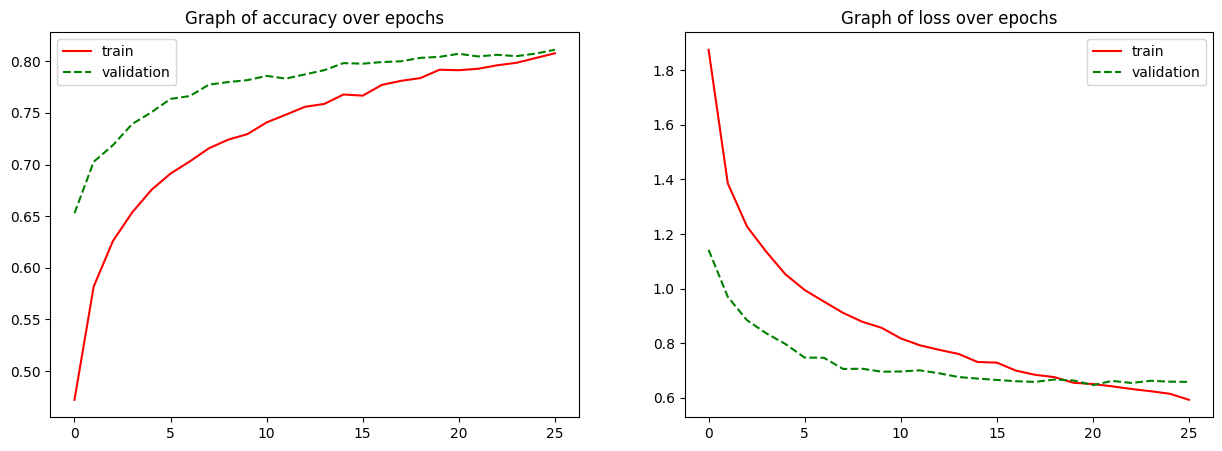

In [31]:
def printplot(history):
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history["accuracy"], color="red", label="train")
        plt.plot(history.history["val_accuracy"], color="green", label="validation", linestyle="dashed")
        plt.title("Graph of accuracy over epochs")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history["loss"], color="red", label="train")
        plt.plot(history.history["val_loss"], color="green", label="validation", linestyle="dashed")
        plt.title("Graph of loss over epochs")
        plt.legend()

printplot(history)

In [32]:
model.save("RESNET.h5")

In [33]:
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

681/681 [==============================] - 118s 173ms/step - loss: 0.6785 - accuracy: 0.8048
Test Accuracy: 80.48%
Test Loss: 0.6785
